In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database. The number of samples in both collections is large enough for training a deep neural network.

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

In [2]:
mitbih_test=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)
mitbih_train=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
print(mitbih_test.shape)
print(mitbih_train.shape)

(21892, 188)
(87554, 188)


In [3]:
print(mitbih_train.head())
type(mitbih_train)

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

pandas.core.frame.DataFrame

In [4]:
mitbih_train_0, mitbih_train_1, mitbih_train_2, mitbih_train_3, mitbih_train_4 = [mitbih_train[mitbih_train.iloc[:,187]==i] for i in [0.0, 1.0, 2.0, 3.0, 4.0]]

Number of samples in each class

(array([72471.,     0.,  2223.,     0.,     0.,  5788.,     0.,   641.,
            0.,  6431.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

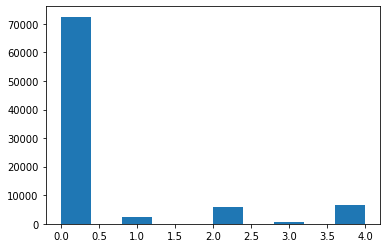

In [5]:
plt.hist(mitbih_train.iloc[:,187])

(array([18118.,     0.,   556.,     0.,     0.,  1448.,     0.,   162.,
            0.,  1608.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

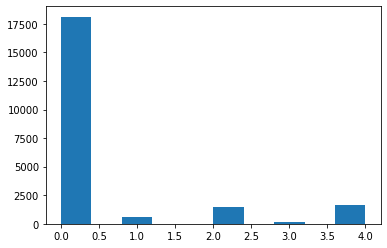

In [6]:
plt.hist(mitbih_test.iloc[:,187])

Looking at the data

In [7]:
print(np.sum(mitbih_train.iloc[:,187]))
print(np.sum(mitbih_test.iloc[:,187]))
print(mitbih_train.shape)
print(mitbih_test.shape)

print(np.sum(mitbih_train.iloc[:,187])/mitbih_train.shape[0])
print(np.sum(mitbih_test.iloc[:,187])/mitbih_test.shape[0])

41446.0
10370.0
(87554, 188)
(21892, 188)
0.4733764305457204
0.47368901881966013


Prepare upsampling of the minority classes

In [8]:
from sklearn.utils import resample

print(mitbih_train.shape)
print(mitbih_test.shape)

value_counts=mitbih_train.iloc[:,mitbih_train.shape[1]-1].value_counts()
print(value_counts)

(87554, 188)
(21892, 188)
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [9]:
mitbih_train_0, mitbih_train_1, mitbih_train_2, mitbih_train_3, 
mitbih_train_4 = [mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]
                               == i] for i in range(5)]

In [11]:
mitbih_train_1_upsample, mitbih_train_2_upsample, mitbih_train_3_upsample, mitbih_train_4_upsample = [resample(mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]==i],replace=True,n_samples=mitbih_train_0.shape[0],random_state=123) for i in range(1,5)]
print(mitbih_train_1_upsample.shape, mitbih_train_2_upsample.shape, mitbih_train_3_upsample.shape, mitbih_train_4_upsample.shape)

(72471, 188) (72471, 188) (72471, 188) (72471, 188)


Upsample the minority classes

In [12]:
mitbih_train_upsampled=np.concatenate((mitbih_train_0,mitbih_train_1_upsample,mitbih_train_2_upsample,mitbih_train_3_upsample,mitbih_train_4_upsample))
mitbih_train_upsampled.shape

mitbih_train_upsampled=pd.DataFrame(mitbih_train_upsampled)
mitbih_train_upsampled.iloc[:,mitbih_train_upsampled.shape[1]-1].value_counts()

0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: 187, dtype: int64

Make pie chart

0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: 187, dtype: int64


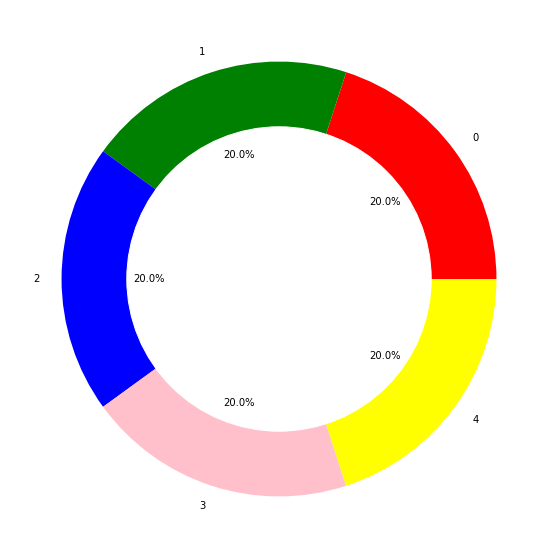

In [13]:
import matplotlib.pyplot as plt
val_counts=mitbih_train_upsampled.iloc[:,mitbih_train_upsampled.shape[1]-1].value_counts()
print(val_counts)

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(val_counts, labels=['0','1','2','3','4'], colors=['red','green','blue','pink','yellow'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Make a list for storing the minimum and maximum of the data

Look at some example signals

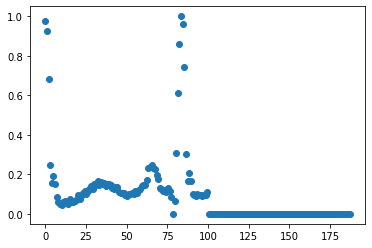

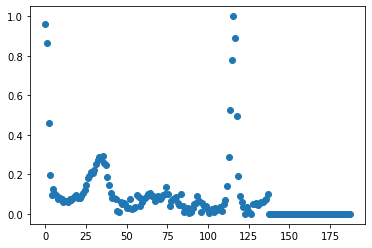

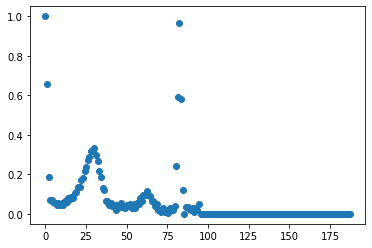

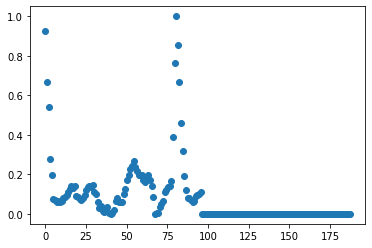

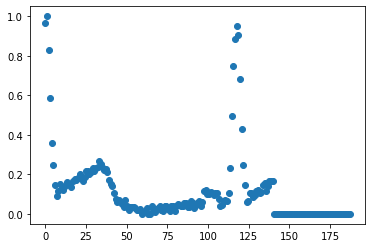

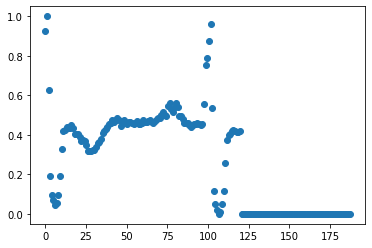

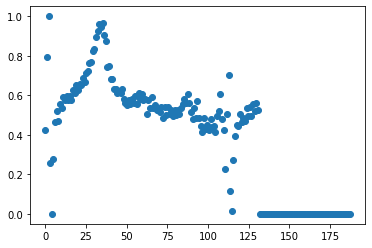

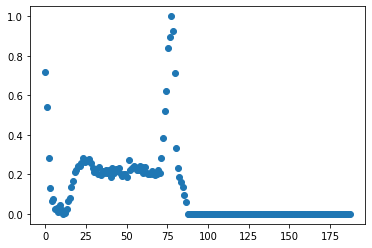

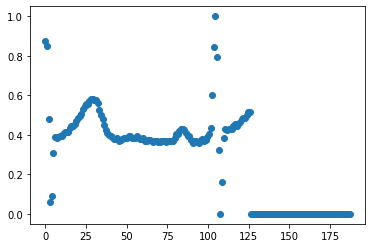

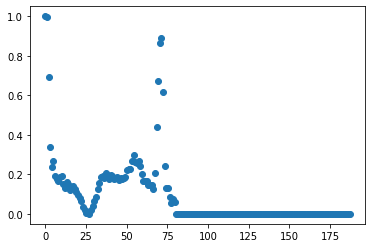

In [14]:
plt.ion()
for i in range(0,10):
    plt.scatter(np.linspace(0,187,187),mitbih_train_upsampled.iloc[i][0:187])
    plt.show()
    plt.pause(2)
    plt.close()

In [15]:
#norm_combined=pd.DataFrame(norm_combined)
#X=norm_combined.iloc[:,0:(norm_combined.shape[1])]
y=mitbih_train_upsampled.iloc[:,mitbih_train_upsampled.shape[1]-1]
#X=norm_combined
X=mitbih_train_upsampled.iloc[:,0:(mitbih_train_upsampled.shape[1]-1)]
print(X.shape)
print(y)
print(np.unique(y))

print(X.shape,y.shape)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
#help(train_test_split)
#X, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.sum(y_train)/len(y_train))
print(np.sum(y_test)/len(y_test))

(362355, 187)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
362350    4.0
362351    4.0
362352    4.0
362353    4.0
362354    4.0
Name: 187, Length: 362355, dtype: float64
[0. 1. 2. 3. 4.]
(362355, 187) (362355,)
(289884, 187)
(289884,)
(72471, 187)
(72471,)
1.9994377061169295
2.002249175532282


Build the model, compile and train. Number of parameters:

In [16]:
print(x_train.shape)
n_param=x_train.shape[0]*x_train.shape[1]
print(n_param)
print(len(np.unique(y_test)))

(289884, 187)
54208308
5


In [17]:
import keras
from keras import layers
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras import Sequential
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)
from keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.utils import to_categorical

Make a simple 1D CNN model

In [18]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model
CNN_model = Sequential()

# Convolutional layers
CNN_model.add(Conv1D(filters=64, kernel_size=10, activation='relu', input_shape=(187, 1)))
CNN_model.add(MaxPooling1D(pool_size=3))
CNN_model.add(Conv1D(filters=120, kernel_size=5, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=3))

# Flatten layer
CNN_model.add(Flatten())

# Fully connected layers
CNN_model.add(Dense(150, activation='relu'))

# Output layer
CNN_model.add(Dense(5, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 178, 64)           704       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 55, 120)           38520     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 120)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2160)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               324150    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 7

In [19]:
input_shape=(x_train.shape[1],1)

In [20]:
input_shape

(187, 1)

In [21]:
input_shape=(x_train.shape[1],1)

In [22]:
print(input_shape)

(187, 1)


In [19]:
# Define the model
dense_model = Sequential()

# Fully connected layers
dense_model.add(Dense(128, activation='relu', input_shape=(187,)))
#dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(512, activation='relu'))
#dense_model.add(Dense(512, activation='relu'))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(128, activation='relu'))

# Output layer
dense_model.add(Dense(5, activation='softmax'))

# Compile the model
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 645       
Total params: 353,541
Trainable params: 353,541
Non-trainable params: 0
________________________________________________

In [24]:
def model_pipeline(model,save_model,x_train,y_train,x_test,y_test,epochs=50):
    model = model
    model.summary()
    #optimizer = keras.optimizers.Adam()
    optimizer = "Adam"
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    ytrain=to_categorical(y_train)
    ytest=to_categorical(y_test)
    x_train1=np.asarray(x_train)
    x_test1=np.asarray(x_test)
    #x_train1=x_train1.reshape(x_train1.shape[0],x_train1.shape[1])
    #x_test1=x_test1.reshape(x_test1.shape[0],x_test1.shape[1])
    x_train1=x_train1.reshape(x_train1.shape[0],x_train1.shape[1],1)
    x_test1=x_test1.reshape(x_test1.shape[0],x_test1.shape[1],1)
    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
    history=model.fit(x_train1,ytrain,validation_data=(x_test1,ytest), 
                      epochs=epochs,verbose=1,callbacks=[es])
    #history = model.fit(train_generator, 
                              #steps_per_epoch=len(df_train)//32, 
                              #epochs=4,
                              #validation_data=val_generator, 
                              #validation_steps=len(df_val)//32,verbose=1,callbacks=callbacks)
    model.save(save_model+'.h5')
    return model

In [25]:
def model_pipeline_rs(model,save_model,x_train,y_train,x_test,y_test,epochs=50):
    model = model
    model.summary()
    #optimizer = keras.optimizers.Adam()
    optimizer = "Adam"
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    ytrain=to_categorical(y_train)
    ytest=to_categorical(y_test)
    x_train1=np.asarray(x_train)
    x_test1=np.asarray(x_test)
    #x_train1=x_train1.reshape(x_train1.shape[0],x_train1.shape[1])
    #x_test1=x_test1.reshape(x_test1.shape[0],x_test1.shape[1])
    x_train1 = x_train1.reshape(x_train1.shape[0], x_train1.shape[1])
    x_test1 = x_test1.reshape(x_test1.shape[0], x_test1.shape[1])
    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)
    history=model.fit(x_train1,ytrain,validation_data=(x_test1,ytest),
                      epochs=epochs,verbose=1,callbacks=[es])
    #history = model.fit(train_generator,
                              #steps_per_epoch=len(df_train)//32,
                              #epochs=4,
                              #validation_data=val_generator,
                              #validation_steps=len(df_val)//32,verbose=1,callbacks=callbacks)
    model.save(save_model+'.h5')
    return model

In [26]:
history_CNN=model_pipeline(CNN_model,'CNN_model',x_train,y_train,x_test,y_test,epochs=30)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 178, 64)           704       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 55, 120)           38520     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 120)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2160)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               324150    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 7

In [27]:
history_NN=model_pipeline_rs(dense_model,'dense_model',x_train,y_train,x_test,y_test,epochs=30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 645       
Total params: 353,541
Trainable params: 353,541
Non-trainable params: 0
________________________________________________

In [25]:
dense_model = keras.models.load_model('/kaggle/input/trained-models/dense_model.h5')

Make a plot of the fully connected dense neural network

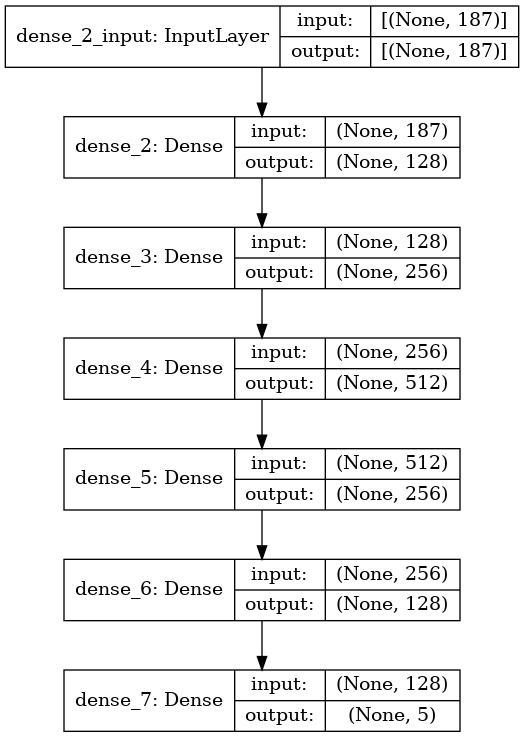

In [28]:
import tensorflow as tf
#tf.keras.utils.plot_model
from tensorflow.keras.utils import plot_model

plot_model(dense_model, to_file = 'model_dense.png')
plot_model(dense_model, to_file = 'model_plot_dense.png', show_shapes = True, show_layer_names = True)

Make a plot of the 1D CNN model

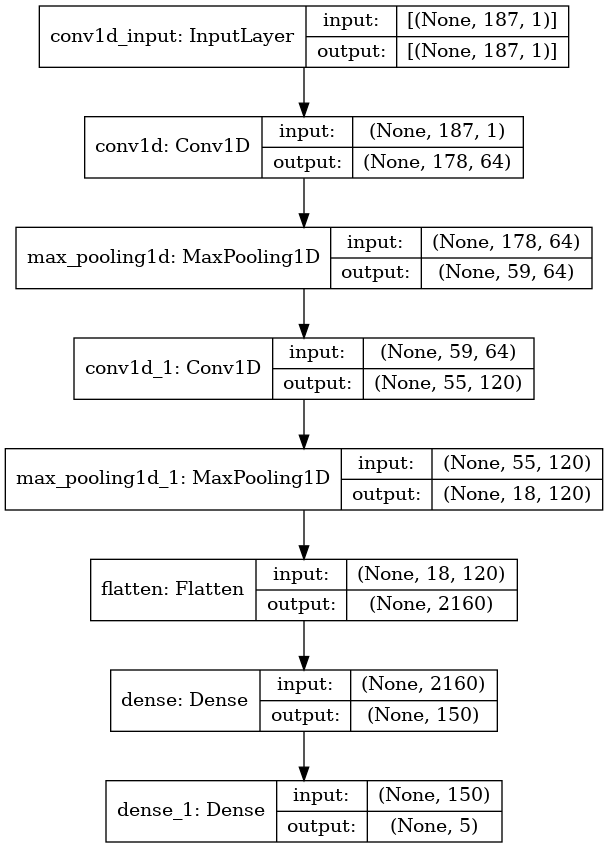

In [29]:
import tensorflow as tf
#tf.keras.utils.plot_model
from tensorflow.keras.utils import plot_model

plot_model(CNN_model, to_file = 'model_CNN.png')
plot_model(CNN_model, to_file = 'model_plot_CNN.png', show_shapes = True, show_layer_names = True)

In [26]:
print(mitbih_test.shape)
test_set=mitbih_test.iloc[:,0:(mitbih_test.shape[1]-1)]
print(test_set.shape)
test_set=np.asarray(test_set)
test_true=mitbih_test.iloc[:,mitbih_test.shape[1]-1]
print(to_categorical(test_true).shape)

(21892, 188)
(21892, 187)
(21892, 5)


In [31]:
print("Evaluation CNN: ")
mse1, acc1 = CNN_model.evaluate(test_set.reshape(test_set.shape[0],test_set.shape[1],1), to_categorical(test_true))
print('CNN mean_squared_error :', mse1)
print('CNN accuracy:', acc1)

Evaluation CNN: 
685/685 [==============================] - 2s 3ms/step - loss: 0.2116 - accuracy: 0.9842
CNN mean_squared_error : 0.2115909457206726
CNN accuracy: 0.9842408299446106


In [27]:
print("Evaluation NN: ")
mse, acc = dense_model.evaluate(test_set.reshape(test_set.shape[0],test_set.shape[1]), to_categorical(test_true))
print('NN mean_squared_error :', mse)
print('NN accuracy:', acc)

Evaluation NN: 
685/685 [==============================] - 4s 3ms/step - loss: 0.4198 - accuracy: 0.9741
NN mean_squared_error : 0.419807493686676
NN accuracy: 0.9741001129150391


In [28]:
print(mitbih_test.shape)
test_set=mitbih_test.iloc[:,0:(mitbih_test.shape[1]-1)]
print(test_set.shape)
test_set=np.asarray(test_set)
test_set=test_set.reshape(test_set.shape[0],test_set.shape[1],1)

## CNN predictions
test_preds_CNN=CNN_model.predict(test_set)
test_true=mitbih_test.iloc[:,mitbih_test.shape[1]-1]

## NN predictions
test_preds_NN=dense_model.predict(test_set.reshape(test_set.shape[0],test_set.shape[1]))
test_true=mitbih_test.iloc[:,mitbih_test.shape[1]-1]

(21892, 188)
(21892, 187)


In [29]:
test_preds_NN

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 5.5052967e-09, 5.6798390e-12, 1.2803670e-11,
        4.6542457e-13],
       [1.0000000e+00, 7.2260068e-25, 1.8334266e-21, 2.8288874e-36,
        8.7797429e-30],
       ...,
       [9.1812896e-36, 1.7317801e-35, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [61]:
list_test_preds=[]
for i in range(len(test_preds_NN)):
    list_test_preds.append(np.argmax(test_preds_NN[i]))

In [65]:
np.where(test_true==1)[0]

array([18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126,
       18127, 18128, 18129, 18130, 18131, 18132, 18133, 18134, 18135,
       18136, 18137, 18138, 18139, 18140, 18141, 18142, 18143, 18144,
       18145, 18146, 18147, 18148, 18149, 18150, 18151, 18152, 18153,
       18154, 18155, 18156, 18157, 18158, 18159, 18160, 18161, 18162,
       18163, 18164, 18165, 18166, 18167, 18168, 18169, 18170, 18171,
       18172, 18173, 18174, 18175, 18176, 18177, 18178, 18179, 18180,
       18181, 18182, 18183, 18184, 18185, 18186, 18187, 18188, 18189,
       18190, 18191, 18192, 18193, 18194, 18195, 18196, 18197, 18198,
       18199, 18200, 18201, 18202, 18203, 18204, 18205, 18206, 18207,
       18208, 18209, 18210, 18211, 18212, 18213, 18214, 18215, 18216,
       18217, 18218, 18219, 18220, 18221, 18222, 18223, 18224, 18225,
       18226, 18227, 18228, 18229, 18230, 18231, 18232, 18233, 18234,
       18235, 18236, 18237, 18238, 18239, 18240, 18241, 18242, 18243,
       18244, 18245,

In [30]:
len(np.where(test_true==3.0)[0])

162

In [31]:
len(test_preds_NN[np.where(test_true==3.0)[0]])

162

In [46]:
test_true.iloc[np.where(test_true==3.0)[0]]

20122    3.0
20123    3.0
20124    3.0
20125    3.0
20126    3.0
        ... 
20279    3.0
20280    3.0
20281    3.0
20282    3.0
20283    3.0
Name: 187, Length: 162, dtype: float64

In [60]:
test_preds_class3

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [9.97841477e-01, 5.98907296e-04, 2.83478184e-05, 1.52907893e-03,
        2.12753457e-06],
       [1.00000000e+00, 2.31003636e-11, 5.67167682e-08, 1.65086987e-12,
        1.26872362e-13],
       [1.16213107e-06, 2.40276119e-34, 4.26024385e-02, 9.57396448e-01,
        0.00000000e+00],
       [3.28662456e-04, 6.70458921e-18, 4.19455878e-02, 9.57725644e-01,
        7.30416469e-16],
       [2.15085747e-05, 5.54259638e-25, 4.18641605e-07, 9.99978065e-01,
        4.37576685e-32],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [1.95955963e-05, 1.52267041e-25, 2.41722233e-08, 9.99980450e-01,
        2.92198637e-33],
       [5.70493271e-11, 0.00000000e+00, 1.58563999e-13, 1.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [5.02688065e-11, 0.0000

In [39]:
list_test_preds=[]
for i in range(len(test_preds_class3)):
    list_test_preds.append(np.argmax(test_preds_class3[i]))

In [59]:
list_test_preds

[3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 3]

In [32]:
test_preds_class3=test_preds_NN[np.where(test_true==3.0)[0]]

In [50]:
np.where(np.array(list_test_preds)!=3)

(array([  1,   2,  20,  21,  32,  38,  40,  42,  59,  61,  64,  74,  85,
         94,  95,  97,  99, 109, 112, 113, 131, 133, 139, 141, 152, 155,
        157]),)

In [58]:
np.where(np.array(list_test_preds)!=3)[0]

array([  1,   2,  20,  21,  32,  38,  40,  42,  59,  61,  64,  74,  85,
        94,  95,  97,  99, 109, 112, 113, 131, 133, 139, 141, 152, 155,
       157])

In [55]:
list_test_preds

[3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 3]

In [53]:
list_test_preds[np.where(np.array(list_test_preds)!=3)[0]]

TypeError: only integer scalar arrays can be converted to a scalar index

In [33]:
for i in range(0,len(test_preds_class3)):
    #print(i)
    print(np.argmax(test_preds_class3[i]))

3
0
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
0
3
3
3
3
3
3
3
3
3
3
0
3
3
3
3
3
0
3
0
3
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
3
2
3
3
0
3
3
3
3
3
3
3
3
3
0
3
3
3
3
3
3
3
3
3
3
0
3
3
3
3
3
3
3
3
0
0
3
0
3
2
3
3
3
3
3
3
3
3
3
2
3
3
0
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
0
3
3
3
3
3
2
3
2
3
3
3
3
3
3
3
3
3
3
0
3
3
0
3
2
3
3
3
3


In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

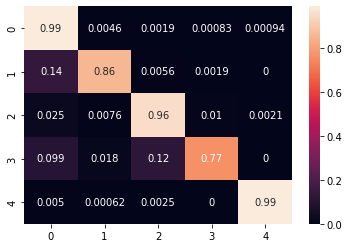

In [40]:
#print(test_preds.shape)
#print(test_true.shape)
cnf_matrix=confusion_matrix(np.argmax(test_preds_CNN,axis=1),test_true)
cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
f = sns.heatmap(cm, annot=True)
plt.savefig('confusion_matrix_heatmap_CNN.png')

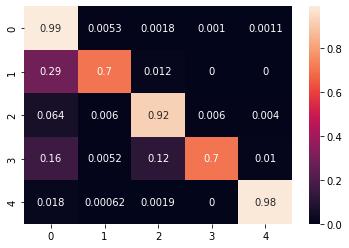

In [41]:
cnf_matrix=confusion_matrix(np.argmax(test_preds_NN,axis=1),test_true)
cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
f = sns.heatmap(cm, annot=True)
plt.savefig('confusion_matrix_heatmap_NN.png')

In [42]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')